# Caso práctico Fintech 2022 - Data Science - Clustering

## Dataset: 🛍🏪 Clientes del centro comercial 💰 

### Información del dataset

El dataset recoge la siguiente información acerca de 200 clientes de un centro comercial:

* **CustomerID**: Identificador unívoco del cliente en cuestión.
* **Gender**: Género o sexo del cliente en cuestión.
* **Age**: Edad del cliente
* **Annual Income**: Ingresos anuales del cliente en cuestión en miles de dólares.
* **Spending Score**: Puntuación de 0 a 100 que se le asigna a un cliente atendiendo a la cantidad de dinero que gasta en el centro comercial. Cuanto mayor sea esta cifra, más gasta el cliente en el centro comercial

El contenido de este notebook está basado en [este](https://www.kaggle.com/roshansharma/mall-customers-clustering-analysis) ejemplo disonible en Kaggle.

### Objetivo de la práctica

El objetivo de esta práctica es usar **algoritmos de aprendizaje no supervisado** (principalmente métodos de **clustering**) para poder realizar una **segmentación de los clientes del supermercado**.

Una vez segmentados la compañía puede hacer uso de los diferentes grupos para poder realizar estrategias de marketing centradas en cada perfil de cliente. 

### Analizando el dataset

Empezamos cargando el dataset en formato .csv en la memoria del sistema

In [1]:
#Importamos la librería/s para hacer uso de su código y funciones
from IPython.display import Image
from IPython.core.display import HTML 
import pandas as pd

mall_customers_df = pd.read_csv('/content/Mall_Customers.csv')
mall_customers_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Eliminamos la variable "CustomerID" ya que no resulta interesante para nada para realizar los ejercicios de segmentación.

Renombramos algunas columnas para que sean más legibres y más fácil trabajas con ellas más en adelante.

In [2]:
mall_customers_df = mall_customers_df.drop(columns=['CustomerID'])
mall_customers_df = mall_customers_df.rename(columns= {'Annual Income (k$)' : 'Annual_income',
                                                       'Spending Score (1-100)' : 'Spending_score'})
mall_customers_df

,Gender,Age,Annual_income,Spending_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


Aprovechamos para visualizar rápidamente alguna información estadística acerca de las variables.

Lo más importante es fijarse en las variables contíneas su valor mínimo ("min") y máximo ("max") para encontrar algún valor atípico o erróneo.

In [3]:
mall_customers_df.describe(include='all')

,Gender,Age,Annual_income,Spending_score
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000
75%,NaN,49.000000,78.000000,73.000000


Realizamos una visualización univariante de las diferentes variables presente, el objetivo es tratar de entender cómo se distribuyen las variables y los posibles valores que pueden tener.

In [4]:
# Función para realizar las principales visualizaciones para las variables CONTINUAS (columns)
# Seleccionadas del dataset (df) seleccionado
def plot_cont_vars_plots(df, columns, base_fig_height = 10):
  import numpy as np
  import matplotlib.pyplot as plt
  import seaborn as sns

  sns.set(style = 'whitegrid')  

  numb_cols = 3
  numb_rows = len(columns)
  
  print('Using plot grid of [{0}] rows and [{1}] cols'.format(numb_rows, numb_cols))
  
  fig, axs = plt.subplots(nrows = numb_rows, ncols = numb_cols)
  axs = np.reshape(axs, (numb_rows, numb_cols))
  
  fig.set_figheight(base_fig_height * numb_rows)
  fig.set_figwidth(20)
  
  counter = 0
  for column, ax in zip(columns, axs):
    sns.histplot(df[column], ax=ax[0], kde= True, color = sns.color_palette()[counter], bins = 50)
    sns.violinplot(x=df[column], ax=ax[1], color = sns.color_palette()[counter])
    sns.boxplot(x=df[column], color = sns.color_palette()[counter], ax=ax[2], width=0.3)
    counter +=1
  #return fig

# Función para realizar las principales visualizaciones para las variables DISCRETAS (columns)
# Seleccionadas del dataset (df) seleccionado
def plot_discret_vars_plots(df, columns, base_fig_height = 10):
  import numpy as np
  import matplotlib.pyplot as plt
  import seaborn as sns

  
  sns.set(style = 'whitegrid')


  numb_cols = 2
  numb_rows = len(columns)
  
  print('Using plot grid of [{0}] rows and [{1}] cols'.format(numb_rows, numb_cols))
  
  fig, axs = plt.subplots(nrows = numb_rows, ncols = numb_cols)
  axs = np.reshape(axs, (numb_rows, numb_cols))
  
  fig.set_figheight(base_fig_height * numb_rows)
  fig.set_figwidth(20)
  
  counter = 0
  for column, ax in zip(columns, axs):
    sns.countplot(data = df, x = column, ax=ax[0], color = sns.color_palette()[counter])
    df.groupby(column).size().plot(kind='pie', ax=ax[1], autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
    counter +=1
  #return fig

Empezamos visualizando las variables discretas, en este caso solo tenemos una:
* Gender

Using plot grid of [1] rows and [2] cols


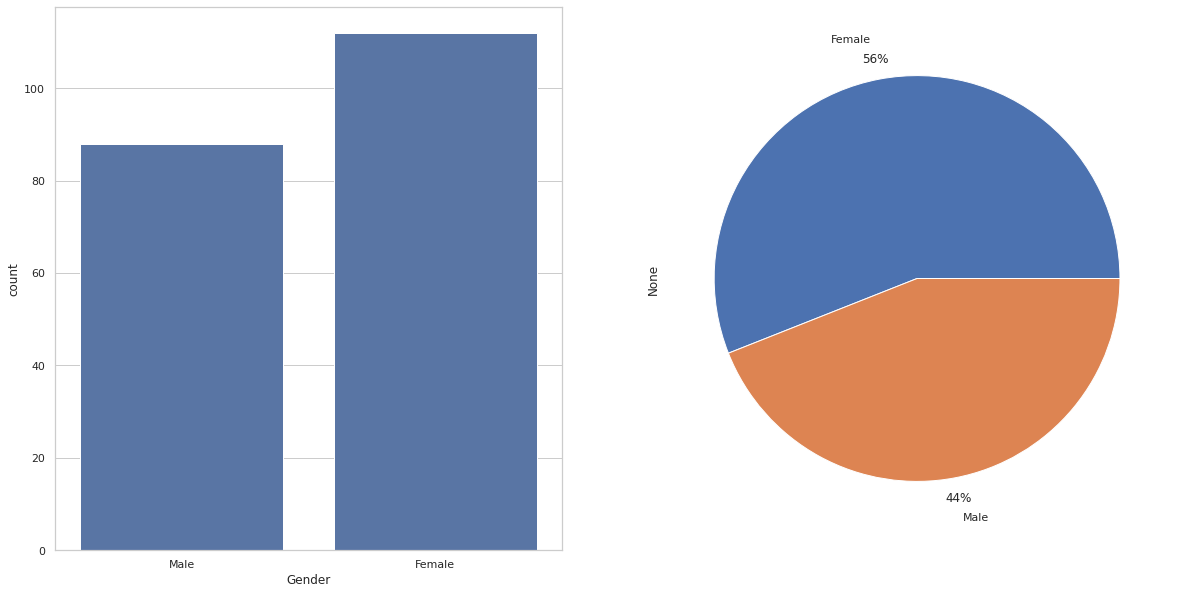

In [5]:
plot_discret_vars_plots(mall_customers_df, ['Gender'])

Ahora es el turno de las variables continuas, el dataset contiene tres:
* Age
* Annual income
* Spending score

Using plot grid of [3] rows and [3] cols


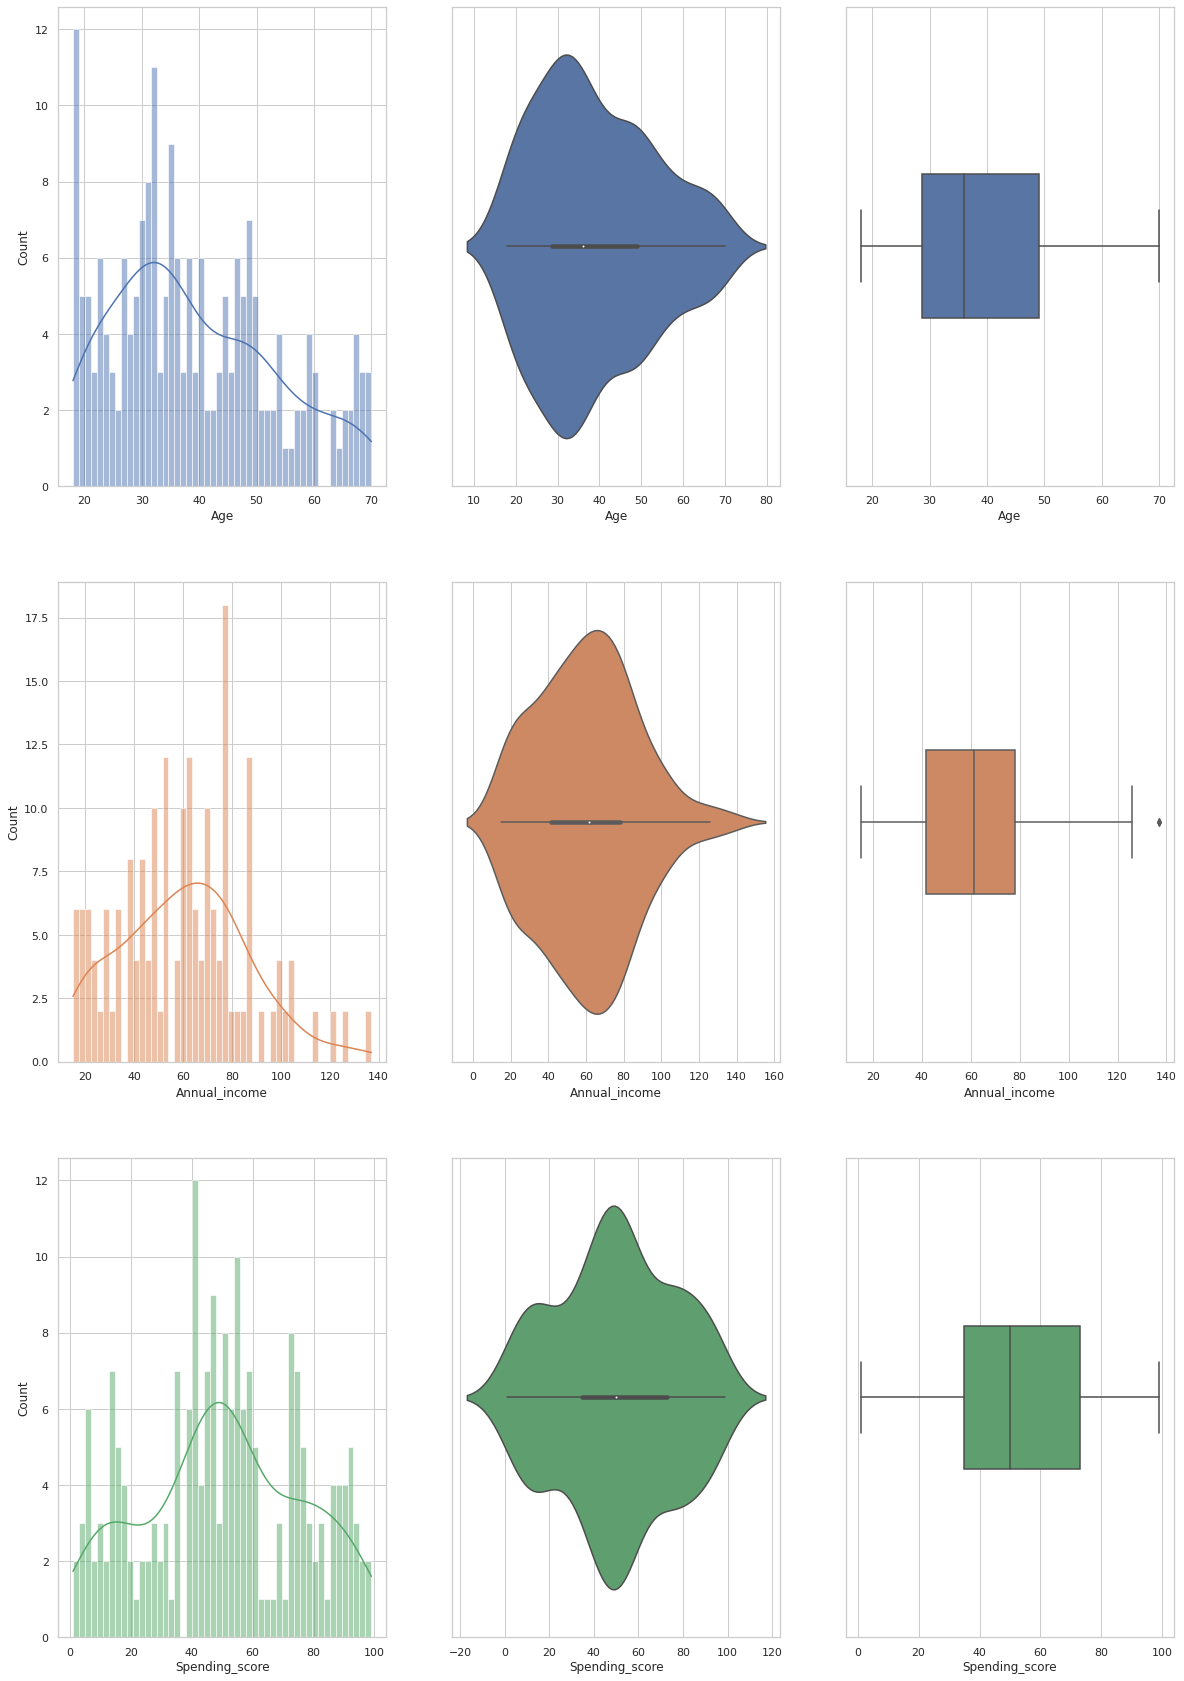

In [6]:
plot_cont_vars_plots(mall_customers_df, ['Age', 'Annual_income', 'Spending_score'])

Parece que las variables se distribuyen de la manera esperada. Solo encontramos un posible outlier en la variable "Annual income" con approximadamente 138.000 dolares de salario. Lo cual es plausible.

Ahora vamos a ver cómo se relaciona la variable categórica "Gender" con el resto de variables:

In [7]:
def make_boxplots_with_same_x_var(df, x_var, y_vars, numb_cols = 2, base_fig_height = 10):
  import matplotlib.pyplot as plt
  import seaborn as sns
  import math
  import numpy as np

  sns.set_theme(style="whitegrid")

  numb_rows = math.ceil(len(y_vars)/ numb_cols)
  
  print('Using plot grid of [{0}] rows and [{1}] cols'.format(numb_rows, numb_cols))
  
  fig, axs = plt.subplots(nrows = numb_rows, ncols = numb_cols)
  axs = np.reshape(axs, (numb_rows, numb_cols))
  
  fig.set_figheight(base_fig_height * numb_rows)
  fig.set_figwidth(20)
  
  counter = 0
  for y_var, ax in zip(y_vars, axs.flatten()):
    sns.boxplot(data = df, x = x_var, y = y_var, ax=ax, width=0.3)
    counter +=1

Using plot grid of [2] rows and [2] cols


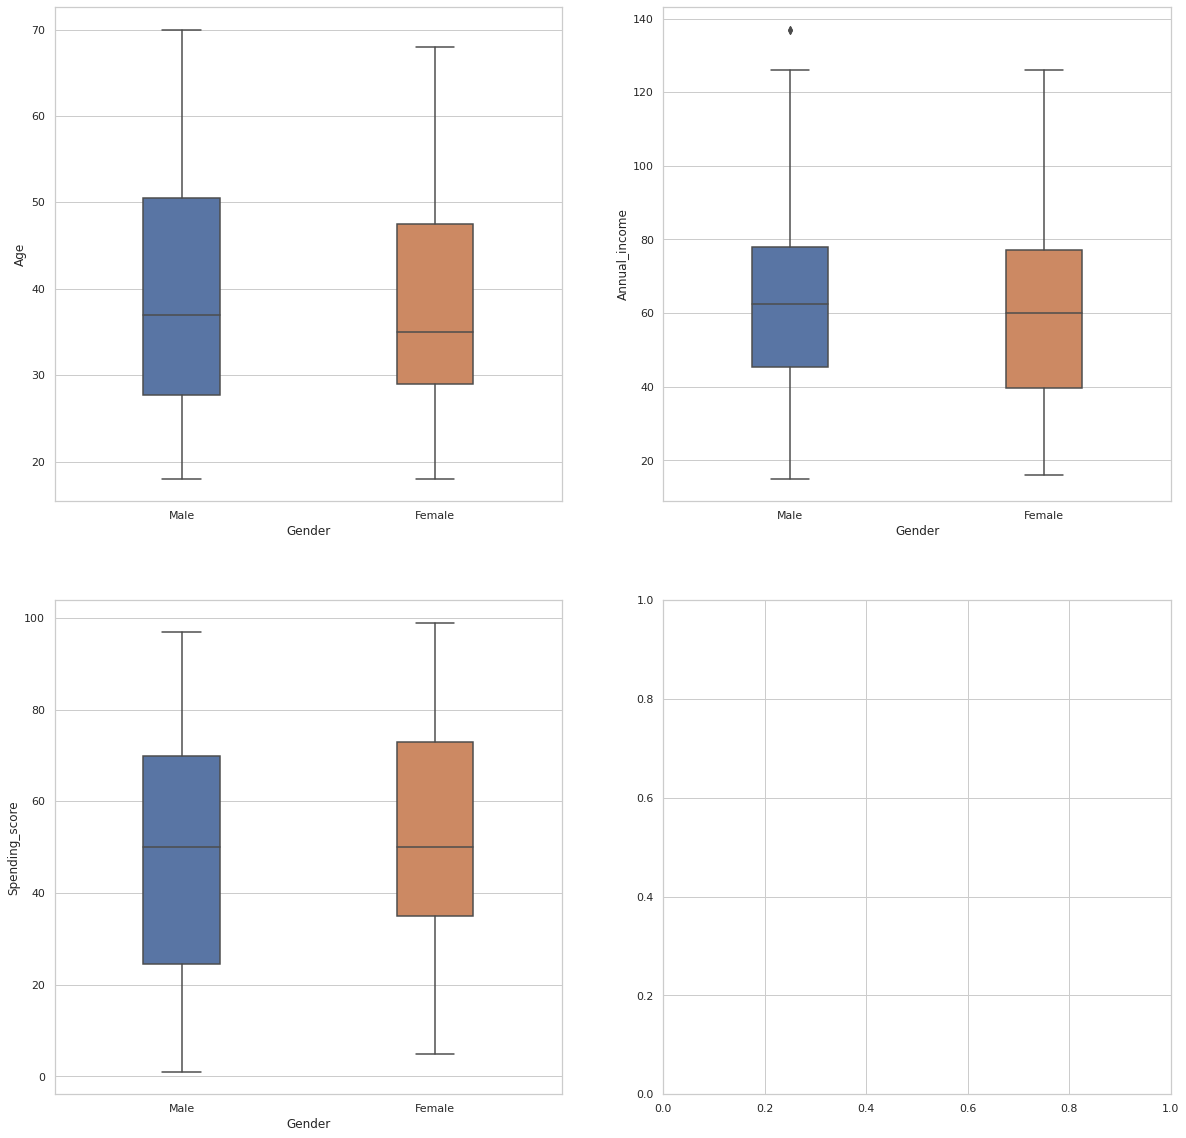

In [8]:
make_boxplots_with_same_x_var(mall_customers_df, 'Gender', ['Age', 'Annual_income', 'Spending_score'])

Ahora vamos a ver cómo se distribuyen cada par de variables continuas en el dataset. Para ello vamos a hacer uso de un "pairplot". El objetivo es intentar **encontrar algún par de variables que tengan un patrón del cual podamos sacar clusters y realizar una buena segmentación de clientes**.

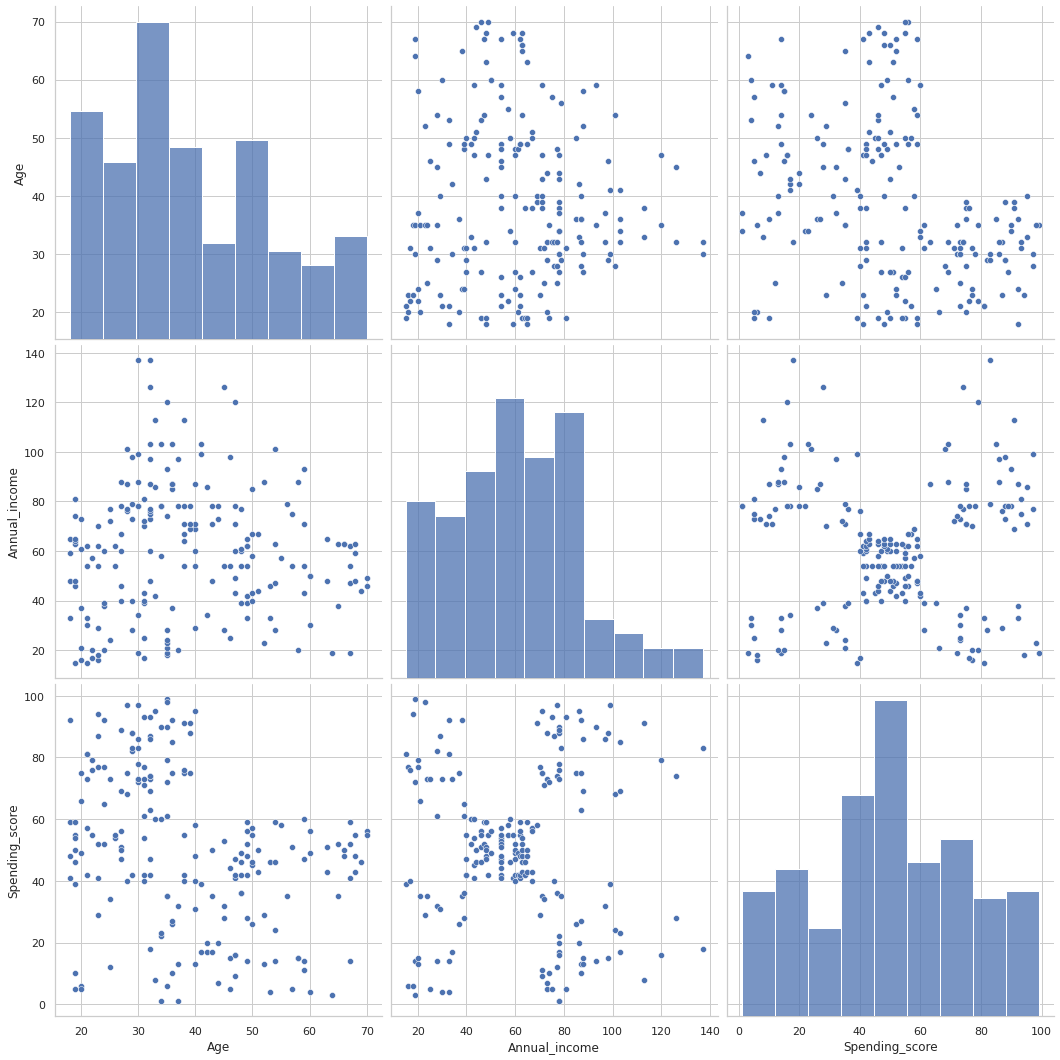

In [9]:
import seaborn as sns

sns.pairplot(mall_customers_df, height = 5)

También podemos intentar ver cómo se relacionan las variables continuas entre si haciendo uso de una matriz de correlación:

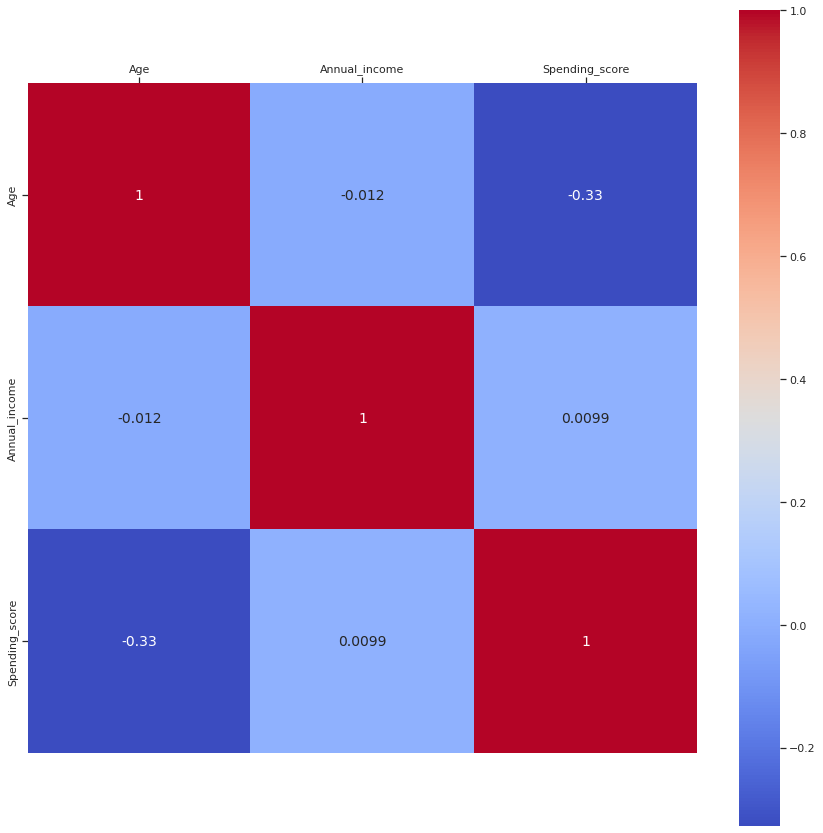

In [10]:
def plot_correlation_matrix(corr_matrix):

  def shorten_big_col_name(col_name):
    if len(col_name)>15:
      return col_name[0:14] + '.'
    else:
      return col_name


  import numpy as np
  import matplotlib.pyplot as plt
  import seaborn as sns
  import math

  fig, ax = plt.subplots(nrows=1, figsize=(15, 15))
  sns.heatmap(corr_matrix, ax=ax, annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})

  ax.xaxis.tick_top()
  shorten_x_labels = [shorten_big_col_name(item.get_text()) for item in ax.get_xticklabels()]
  ax.set_xticklabels(shorten_x_labels)

  ax.xaxis.set_label_position('top') 
  ax.yaxis.tick_left()
  shorten_y_labels = [shorten_big_col_name(item.get_text()) for item in ax.get_yticklabels()]
  ax.set_yticklabels(shorten_y_labels)
  

plot_correlation_matrix(mall_customers_df.corr())

Parece que la única relación clara entre las vairbales de los clientes es que cuanto mayot es la edad del cliente, tiende a gastar menos.

También vamos a preprar un método para poder realizar la visualización de las tres variables continuas del dataset en tres dimensiones (3D):

In [11]:
def make_3d_scatter_plot(data, col_x, col_y, col_z, col_labels = None):
  import plotly.offline as py
  import plotly.graph_objs as go

  trace1 = go.Scatter3d(
      x= data[col_x],
      y= data[col_y],
      z= data[col_z],
      mode='markers',
      marker=dict(
          color = data[col_labels] if col_labels is not None else None,
          size= 10,
          line=dict(
              color = data[col_labels] if col_labels is not None else None,
              width= 12
          ),
          opacity=0.8
      )
  )
  df = [trace1]

  layout = go.Layout(
      title = '3D plot',
      margin=dict(
          l=0,
          r=0,
          b=0,
          t=0  
      ),
      scene = dict(
              xaxis = dict(title  = col_x),
              yaxis = dict(title  = col_y),
              zaxis = dict(title  = col_z)
          )
  )

  fig = go.Figure(data = df, layout = layout)
  py.iplot(fig)

make_3d_scatter_plot(mall_customers_df, 'Age', 'Annual_income', 'Spending_score')

La última comprobación que hacemos trata de encontrar valores faltantes dentro del dataset con el que estamos trabajando.

In [12]:
def display_missing(df):    
    for col in df.columns.tolist():          
        print('{} column missing values: {} - in percentage {}%'.format(col, df[col].isnull().sum(), df[col].isnull().sum()/len(df) * 100))
    print('\n')
    
display_missing(mall_customers_df)

Gender column missing values: 0 - in percentage 0.0%
Age column missing values: 0 - in percentage 0.0%
Annual_income column missing values: 0 - in percentage 0.0%
Spending_score column missing values: 0 - in percentage 0.0%




No hemos encontrado ningún valor faltante, no hace falta ningún tratamiento al respecto.

### Clustering

Tal y como hablamos al principio de esta práctica. El objetivo es buscar diferentes perfiles de cliente dentro de la tienda.

Con este objetivo, vamos a aplicar algoritmos de clustering (aprendizaje no supervisado) para poder encontrar clientes estadísticamente similares.

#### K-means

Este algoritmo lo que busca es, a partir de un núermo de clusters (K) deseado, encontrar los centroides (centro en el espacio paramétrico de un cluster) que tengan más cercanos los puntos del cluster que representan.

En las siguientes imágenes se muestra este processo:
* En la primera se observa cómo el algoritmo, de manera iterativa busca poner los centroides para que estén lo más próximos posibles a los puntos del cluster que definen.

* En la segunda se muestra cómo calcula la distancia de los puntos al cetnroide para poder ir mejorando su posición en cada iteración.

In [13]:
!wget https://www.baeldung.com/wp-content/uploads/2019/08/Date-copy.png

--2022-01-23 19:23:26--  https://www.baeldung.com/wp-content/uploads/2019/08/Date-copy.png
Resolving www.baeldung.com (www.baeldung.com)... 172.66.40.248, 172.66.43.8, 2606:4700:3108::ac42:2b08, ...
Connecting to www.baeldung.com (www.baeldung.com)|172.66.40.248|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18248 (18K) [image/png]
Saving to: ‘Date-copy.png’

Date-copy.png       100%[===================>]  17.82K  --.-KB/s    in 0s      

2022-01-23 19:23:27 (103 MB/s) - ‘Date-copy.png’ saved [18248/18248]



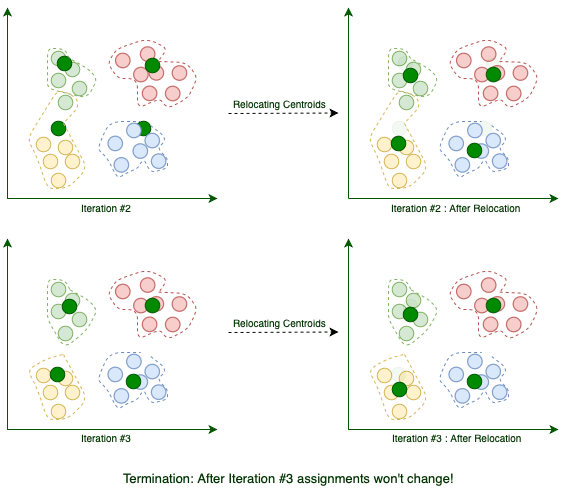

In [14]:
Image('/content/Date-copy.png')

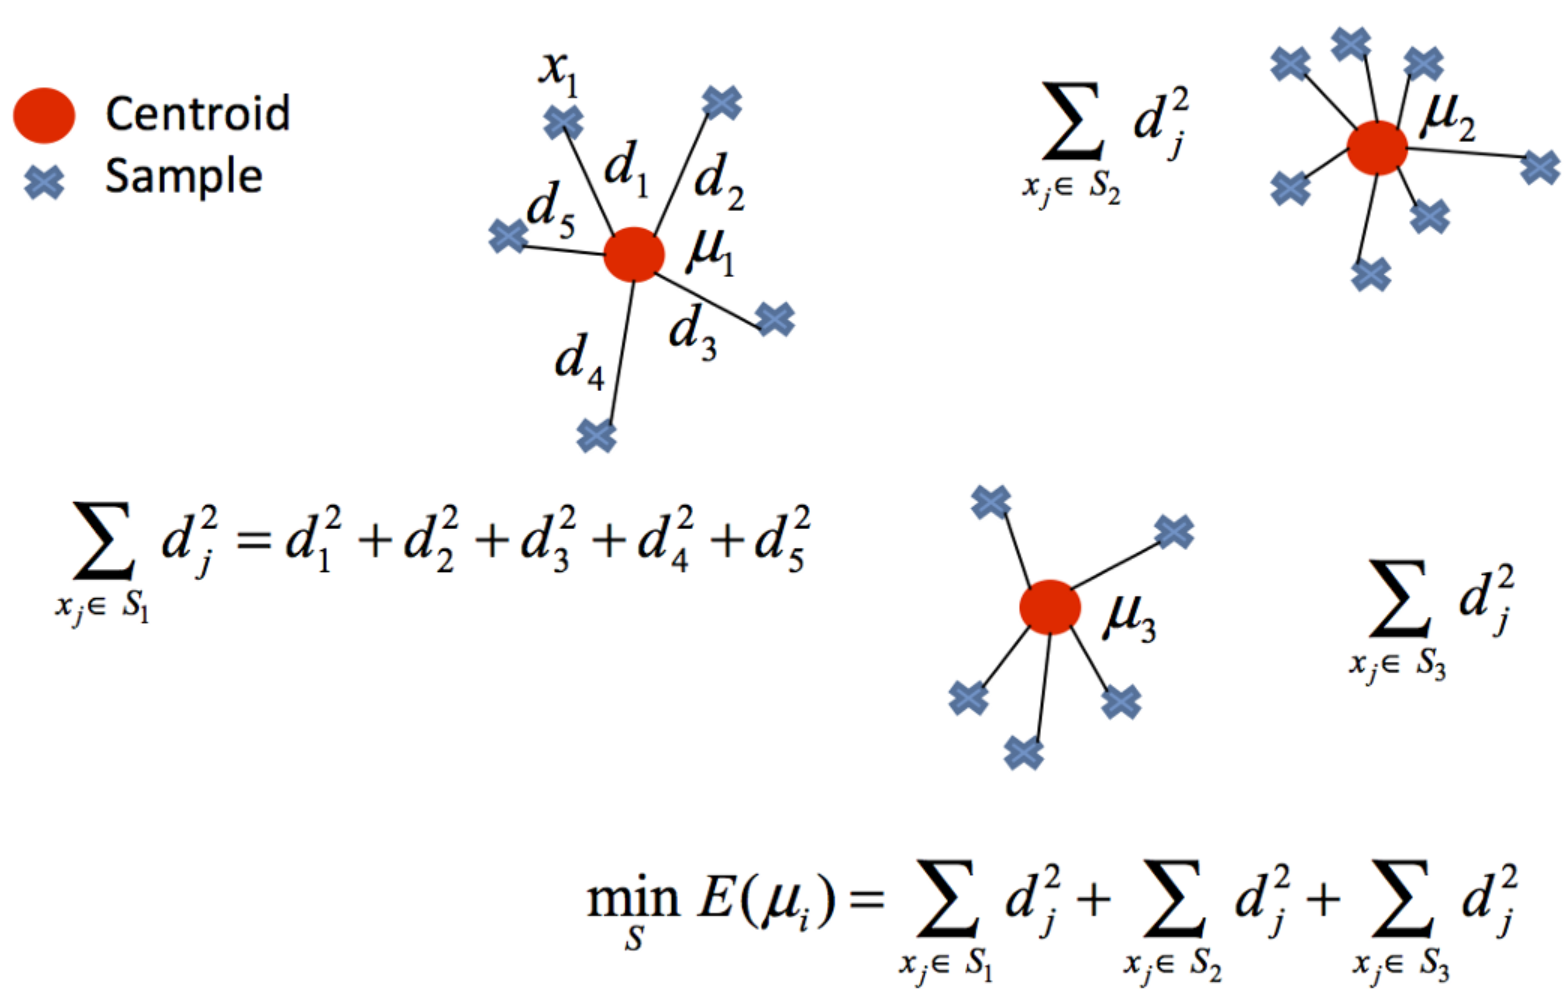

##### Clustering - Annual Income & Spending Score

El primer ejercició en el que vamos a aplicar kmeans es en el caso de que queramos crear grupos a partir de las variables:

* Annual Income
* Spending Score

Seleccionamos las columnas que vamos a usar

In [15]:
clustering_data = mall_customers_df[[ 'Spending_score', 'Annual_income']]
clustering_data

,Spending_score,Annual_income
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17
...,...,...
195,79,120
196,28,126
197,74,126
198,18,137


Visualizamos las dos variables para poder ver a simple vista si el proceso de clusterización puede resultar sencillo o no.

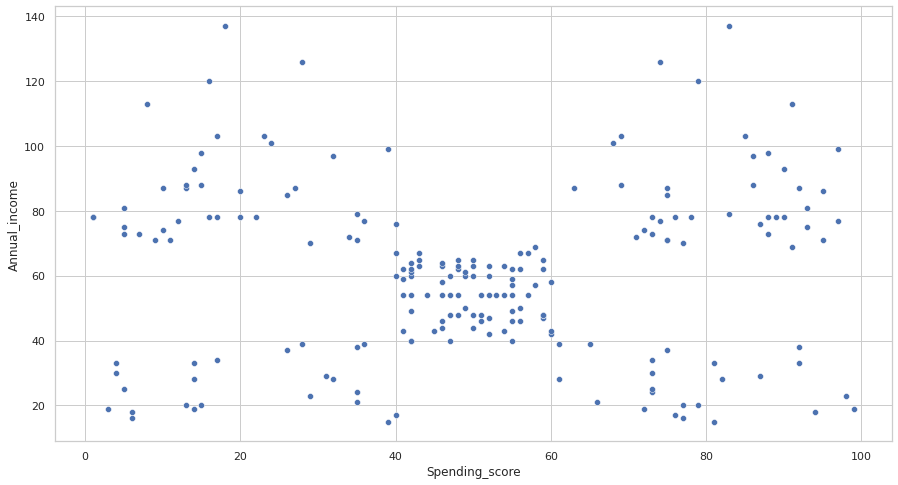

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (15,8))
sns.scatterplot(data = clustering_data, x='Spending_score', y = 'Annual_income')

Observamos cinco grupos bastante distintivos.

Recordamos el algoritmo K-means necesita saber el núermo de clusters que se quiere encontrar. Esto no es siempre una tarea sencilla. Es por ello que se usa el "**Elbow method**".

Este método lo que busca es **encontrar el mínimo número de clusters necesarios para tener el mejor resultado de clustering**. Para ello se ejecuta el algoritmo K-means con diferente número de clusters y se calcula la distancia media de cada cluster al resto de puntos del dataset. Una vez se recogen los resultados, se **busca el "codo" en la gráfica para usar el núermo de clusters seleccionado como el que se usará de manera definitiva**.

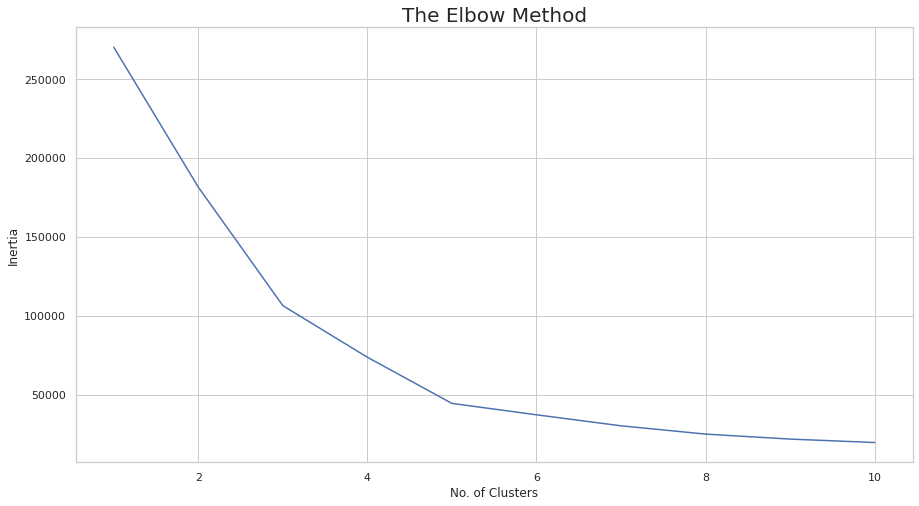

In [17]:
from sklearn.cluster import KMeans

inertias = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    km.fit(clustering_data)
    inertias.append(km.inertia_)

plt.figure(figsize = (15,8))
    
plt.plot(range(1, 11), inertias)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.show()

En este caso, tal y como preveíamos, el "codo" parece encontrarse en el número de clusters 5. Es por esto que vamos a intentar **buscar 5 clusters** usando este método.

En la siguiente celda se **muestra cómo funciona el algoritmo K-means por cada iteración del algoritmo** visualizamos dónde se van posicionando los centroides del cluster:

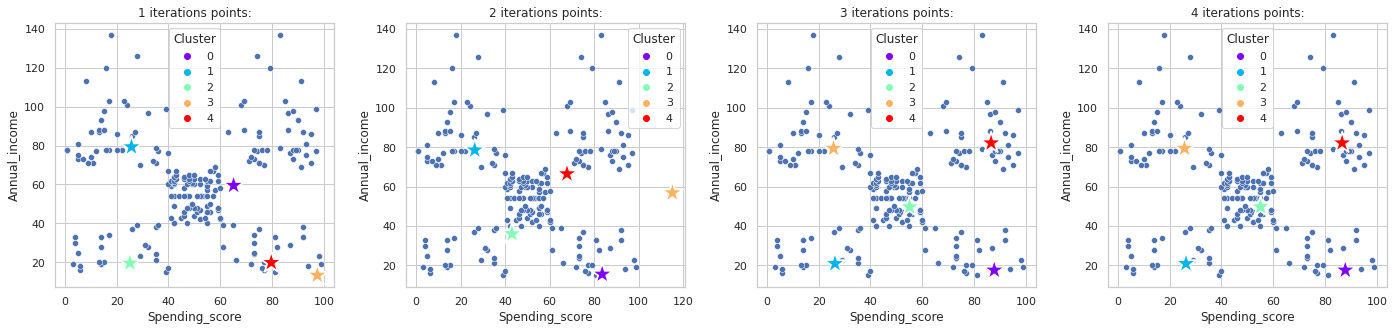

In [18]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

fig, axs = plt.subplots(nrows=1, ncols=4,figsize=(20,5))
fig.tight_layout(pad=3.0)

from sklearn.cluster import KMeans
for i, ax in enumerate(axs.flatten()):
    ax.title.set_text(f"{i+1} iterations points:")
    kmeans = KMeans(n_clusters=5, init = 'random', random_state=42, max_iter=i+1, n_init = i+1)
    kmeans.fit(clustering_data)
    centroids=pd.DataFrame(kmeans.cluster_centers_, columns=['Annual_income', 'Spending_score'])
    centroids['Cluster'] = range(0, len(centroids))
    #print(centroids)
    sns.scatterplot(data = clustering_data, x='Spending_score', y = 'Annual_income', ax=ax)
    sns.scatterplot(data = centroids, x='Spending_score', y = 'Annual_income', ax = ax,  s=500, marker="*", hue = 'Cluster', palette= 'rainbow')

Hacemos uso del algoitmo para, finalmente, asignar un cluster a cada cliente (cada fila de datos)

In [19]:
kmeans = KMeans(n_clusters=5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
kmeans.fit(clustering_data)
centroids=pd.DataFrame(kmeans.cluster_centers_, columns=['Spending_score', 'Annual_income'])

clustering_data['Cluster'] = kmeans.predict(clustering_data)
clustering_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Spending_score,Annual_income,Cluster
0,39,15,2
1,81,15,3
2,6,16,2
3,77,16,3
4,40,17,2
...,...,...,...
195,79,120,4
196,28,126,1
197,74,126,4
198,18,137,1


Visualizamos los clusters a los que pertenecen cada cliente en el dataset después de aplicar el método. 

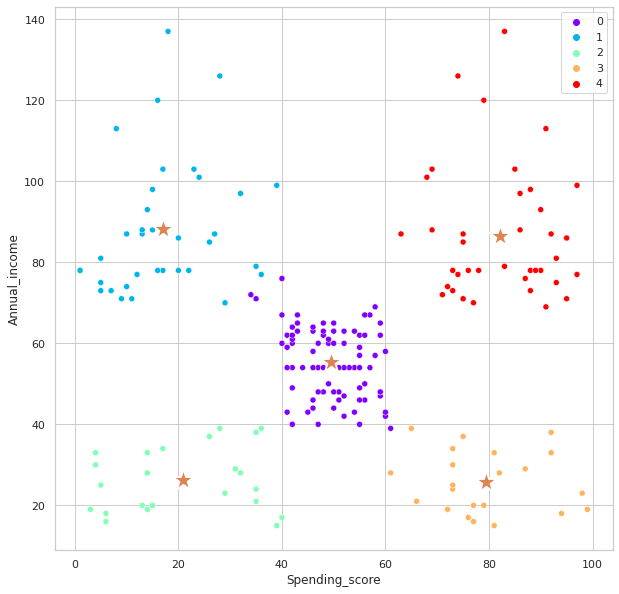

In [20]:
def plot_clustering_results(clustering_data, var_x, var_y, cluster_centroids = None):
  fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,10))
  sns.scatterplot(data = clustering_data, x = var_x, y = var_y, hue='Cluster', ax=ax, palette = 'rainbow')
  if cluster_centroids is not None:
    sns.scatterplot(data = cluster_centroids, x= var_x, y = var_y, ax=ax, s=500, marker="*")

plot_clustering_results(clustering_data, 'Spending_score', 'Annual_income', centroids)

Una vez el método ha asignado los clusters, un experto de negocio suele asignar una etiqueta a cada uno de ellos.

Por ejemplo en este caso el grupo superior izquierda podría etiquetarse como "Clientes prudentes". Son clientes que, a pesar de tener buenas ganancias, no gastan mucho en el supermercado. 

Ahora, ¿Qué pasa si queremos saber a qué grupo pertence un nuevo cliente?

Una vez tenemos los clusters definidos por k-means, se crean áreas que definen el grupo al que pertenece cualquier punto nuevo.

Es más facil entenderlo si lo visualizamos, estas áreas se pueden visualizar y se llaman comúnmente diagramas de [Voronoi](https://mathworld.wolfram.com/VoronoiDiagram.html).

El siguiente método permite dibujar los polígonos o áreas que definen la asignación de cualquier punto en cualquiera de los clusters creados por k-means. El método también permite que el usuario introduzca un nuevo punto para que visualice en qué cluster pertenecería (se representa como un cuadrado):

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



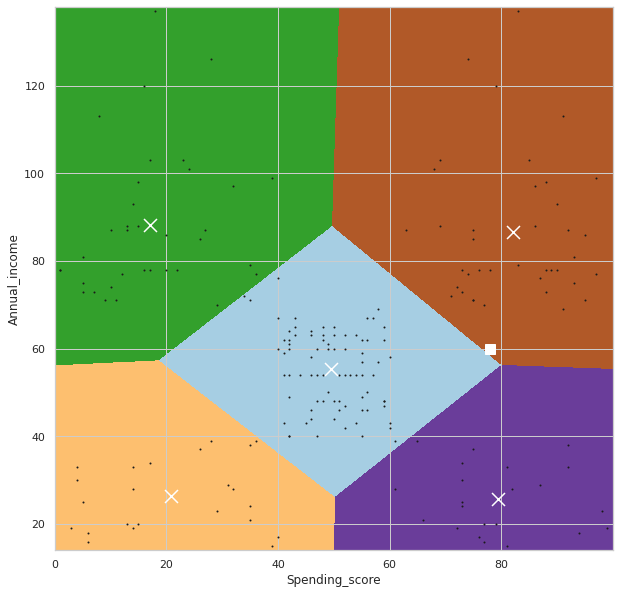

In [21]:
def plot_clustering_results_voronoi(clustering_data, var_x, var_y, cluster_centroids, cluster_model, custom_data = None):
  import numpy as np

  fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,10))

  h = 0.02 # Step size fo the mesh
  x_min, x_max = clustering_data[var_x].min() - 1, clustering_data[var_x].max() + 1
  y_min, y_max = clustering_data[var_y].min() - 1, clustering_data[var_y].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  #print(xx, yy)

  Z = cluster_model.predict(np.c_[xx.ravel(), yy.ravel()])
  #print(Z)

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)

  plt.figure(1)
  plt.clf()
  plt.imshow(
      Z,
      interpolation="nearest",
      extent=(xx.min(), xx.max(), yy.min(), yy.max()),
      cmap=plt.cm.Paired,
      aspect="auto",
      origin="lower"
  )

  plt.plot(clustering_data[var_x], clustering_data[var_y], "k.", markersize=2)
  # Plot the centroids as a white X
  plt.scatter(
      cluster_centroids[var_x],
      cluster_centroids[var_y],
      marker="x",
      s=169,
      linewidths=3,
      color="w",
      zorder=10,
  )

  if custom_data is not None:
    plt.plot(custom_data[var_x], custom_data[var_y], "k.", markersize=10, marker = 's', color = 'white')
  
  plt.xlabel(var_x)
  plt.ylabel(var_y)

plot_clustering_results_voronoi(clustering_data,'Spending_score', 'Annual_income',
                               centroids, kmeans, custom_data= {'Annual_income' : 60, 'Spending_score' : 78})

Vamos a visualizar los clusteres en las tres dimensiones (Edad, ingresos y puntuación de compra).

In [22]:
all_data_with_cluster = mall_customers_df.join(clustering_data[['Cluster']], how='inner')

make_3d_scatter_plot(all_data_with_cluster, 'Age', 'Annual_income', 'Spending_score', col_labels='Cluster')

Dado que hemos hecho el clustering sin tener en cuenta la edad, se puede observar cómo esta variable no tiene influencia a la hora de generar clusters.

##### Clustering - Age & Anual Income & Spending Score

Ahora vamos a repetir el ejercicio anterior teniendo en cuenta también la edad. Esto quiere decir que el clustering se va a realizar en un espacio tridimensional teniendo en cuenta la siguiente información de los clientes:

* Edad
* Ingresos anuales
* Puntuación de gastos en el supermercado

Seleccionamos dichas variables.

In [23]:
clustering_data_2 = mall_customers_df[['Age', 'Annual_income', 'Spending_score']]
clustering_data_2

,Age,Annual_income,Spending_score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


Realizamos la búsqueda del número ideal de clusters con el "Elbow method".

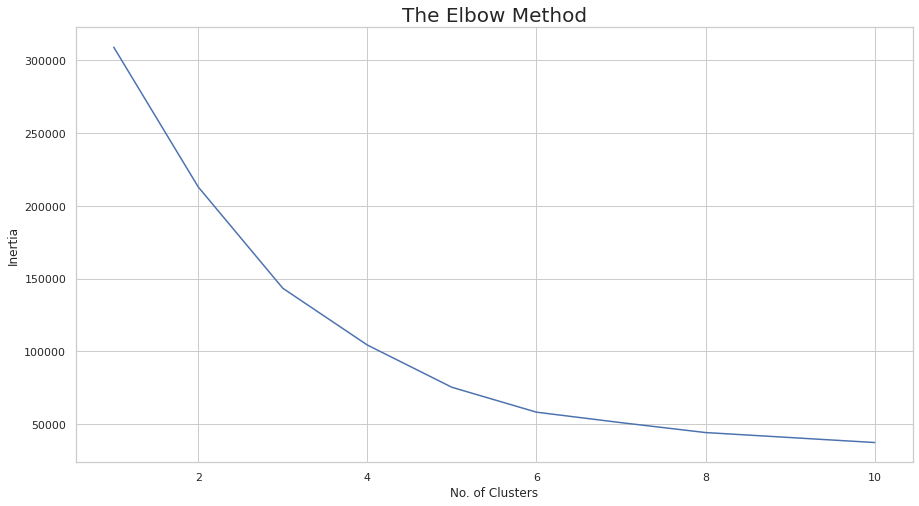

In [24]:
from sklearn.cluster import KMeans

inertias = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    km.fit(clustering_data_2)
    inertias.append(km.inertia_)

plt.figure(figsize = (15,8))
    
plt.plot(range(1, 11), inertias)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.show()

Realizamos el clustering con 6 clusters tal y como nos indica el "Elbow method".

In [25]:
kmeans = KMeans(n_clusters=6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
kmeans.fit(clustering_data_2)
centroids=pd.DataFrame(kmeans.cluster_centers_, columns=['Age', 'Annual_income', 'Spending_score'])

clustering_data_2['Cluster'] = kmeans.predict(clustering_data_2)
clustering_data_2

,Age,Annual_income,Spending_score,Cluster
0,19,15,39,0
1,21,15,81,3
2,20,16,6,0
3,23,16,77,3
4,31,17,40,0
...,...,...,...,...
195,35,120,79,1
196,45,126,28,5
197,32,126,74,1
198,32,137,18,5


Visualizamos los resultados en tres dimensiones:

In [26]:
make_3d_scatter_plot(clustering_data_2, 'Age', 'Annual_income', 'Spending_score', col_labels='Cluster')

##### Clustering - PCA

Para este ejercico vamos a aplicar una técnica adicional de aprendizaje no supervisado: reducción de dimensionalidad.

Vamos a repetir el ejercico anterior, pero vamos a pasar de tres dimensiones a dos haciendo uso del método [PCA](https://en.wikipedia.org/wiki/Principal_component_analysis) (Principal Component Analysis).

Esto permitirá que la visualización sea más comoda en dos dimensiones.

Seleccionamos las variables

In [27]:
clustering_data_3 = mall_customers_df[['Age', 'Annual_income', 'Spending_score']]
clustering_data_3

,Age,Annual_income,Spending_score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


Realizamos la reducción de dimensionalidad y extraemos dos variables a partir de las tres dadas.

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
clustering_data_3[['PC_1', 'PC_2']] = pca.fit_transform(clustering_data_3)
clustering_data_3

,Age,Annual_income,Spending_score,PC_1,PC_2
0,19,15,39,-31.870508,-33.001425
1,21,15,81,0.763397,-56.843865
2,20,16,6,-57.408726,-13.122936
3,23,16,77,-2.169896,-53.477905
4,31,17,40,-32.174920,-30.387005
...,...,...,...,...,...
195,35,120,79,58.353072,31.016926
196,45,126,28,19.909355,66.446425
197,32,126,74,58.521858,38.343853
198,32,137,18,20.981105,79.375146


Text(0, 0.5, 'PC_2 - Explained variance ratio: 44.0985%')

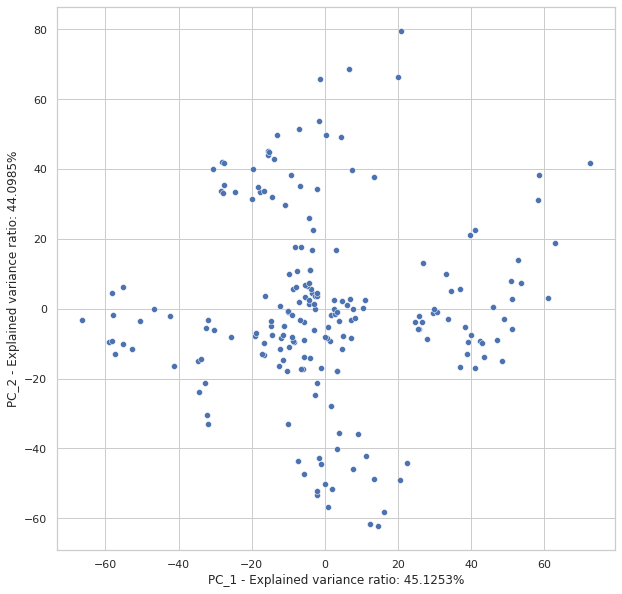

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,10))

explained_var_ratio = pca.explained_variance_ratio_ * 100

sns.scatterplot(data = clustering_data_3, x = 'PC_1',
                                          y = 'PC_2')

plt.xlabel('PC_1 - Explained variance ratio: {0}%'.format(round(explained_var_ratio[0], 4)))
plt.ylabel('PC_2 - Explained variance ratio: {0}%'.format(round(explained_var_ratio[1], 4)))

Calculamos el número idóneo de clusters por medio del "Elbow method".

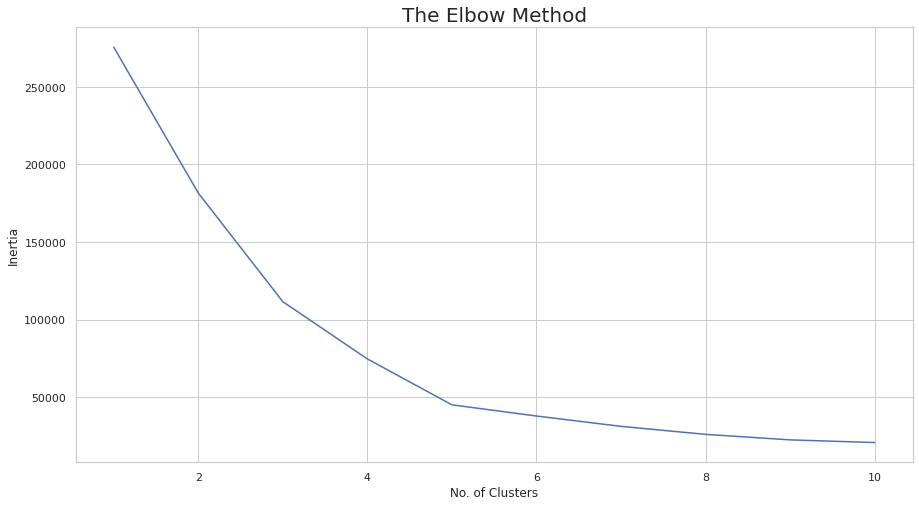

In [30]:
from sklearn.cluster import KMeans
clustering_data_3_pca = clustering_data_3[['PC_1', 'PC_2']]
inertias = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    km.fit(clustering_data_3_pca)
    inertias.append(km.inertia_)

plt.figure(figsize = (15,8))
    
plt.plot(range(1, 11), inertias)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.show()

Creamos los 5 clusters y asignamos a cada cliente el cluster al que pertence.

In [31]:
kmeans = KMeans(n_clusters=5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
kmeans.fit(clustering_data_3_pca)
centroids=pd.DataFrame(kmeans.cluster_centers_, columns=['PC_1', 'PC_2'])

clustering_data_3_pca['Cluster'] = kmeans.predict(clustering_data_3_pca)
clustering_data_3_pca

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,PC_1,PC_2,Cluster
0,-31.870508,-33.001425,2
1,0.763397,-56.843865,4
2,-57.408726,-13.122936,2
3,-2.169896,-53.477905,4
4,-32.174920,-30.387005,2
...,...,...,...
195,58.353072,31.016926,1
196,19.909355,66.446425,3
197,58.521858,38.343853,1
198,20.981105,79.375146,3


Visualizamos los clusters con sus centroides y los clientes que pertencen a cada uno.

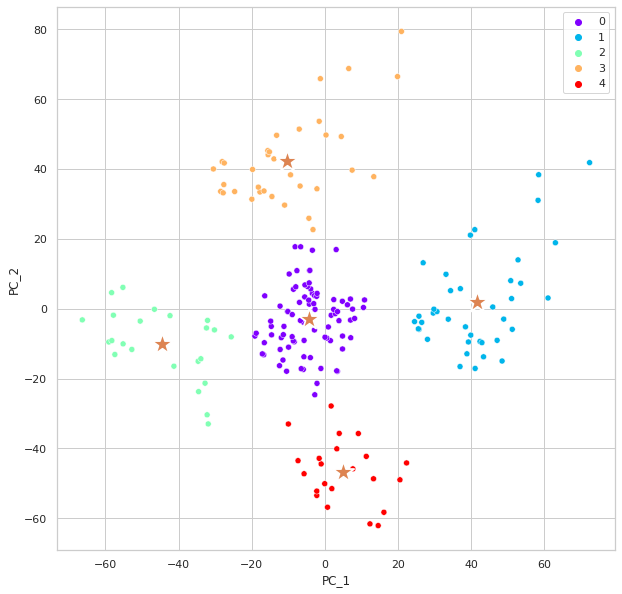

In [32]:
plot_clustering_results(clustering_data_3_pca, 'PC_1', 'PC_2', centroids)

Visualizamos las áreas creadas por cada clusters mediante un diagrama de Voronoi

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



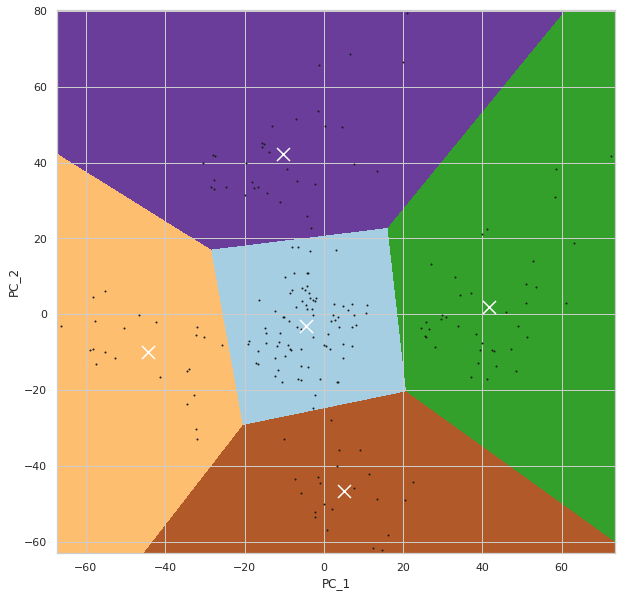

In [33]:
plot_clustering_results_voronoi(clustering_data_3_pca, 'PC_1', 'PC_2', centroids, kmeans)

#### Hiererchical clustering (Clustering jerárquico)

Ahora vamos a aplicar otra técnica de clustering en la cual podemos elegir a qué distancia máxima en el espacio paramétrico queremos parar de crear clusters.

Uno de los métodos de clusteríng dentro de esta vertiente, clustering aglomerativo, empieza interpretando cada punto en el dataset como un cluster y después, de manera iterativa, combina los clusteres más cercanos hasta que se llegua a la distancia máxima deseada.

Vemos las dos vertientes de clustering jerárquico en la siguiente imagen:

In [34]:
!wget https://quantdare.com/wp-content/uploads/2016/06/AggloDivHierarClustering-1150x559.png

--2022-01-23 19:23:42--  https://quantdare.com/wp-content/uploads/2016/06/AggloDivHierarClustering-1150x559.png
Resolving quantdare.com (quantdare.com)... 178.33.160.126
Connecting to quantdare.com (quantdare.com)|178.33.160.126|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 250756 (245K) [image/png]
Saving to: ‘AggloDivHierarClustering-1150x559.png’

AggloDivHierarClust 100%[===================>] 244.88K   905KB/s    in 0.3s    

2022-01-23 19:23:43 (905 KB/s) - ‘AggloDivHierarClustering-1150x559.png’ saved [250756/250756]



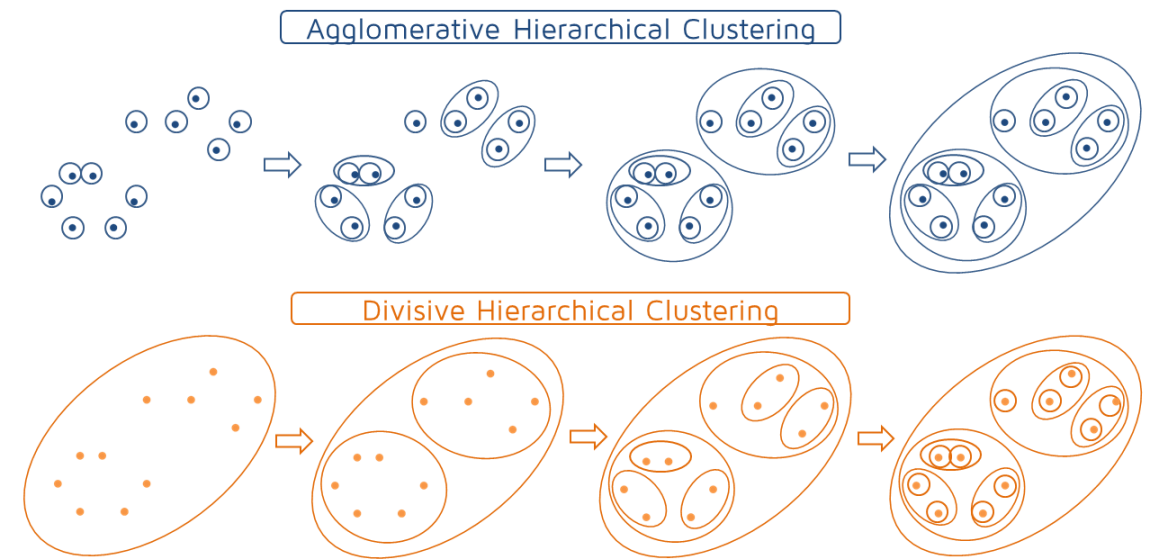

In [35]:
Image('/content/AggloDivHierarClustering-1150x559.png')

##### Clustering - Annual Income & Spending Score

Para este ejercicio vamos a usar las variables:

* Annual Income
* Spending Score

Seleccionamos las variables a usar

In [36]:
clustering_data_4 = mall_customers_df[['Annual_income', 'Spending_score']]
clustering_data_4

,Annual_income,Spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


En clustering aglomerativo el primer paso antes de escoger una distancia máxima se suele dibujar un [dendograma](https://www.displayr.com/what-is-dendrogram/). El dendograma indica a qué distancias se han combinado los diferentes clusters y nos indica el número de clusters resultantes al seleccionar la distancia máxima del algoritmo.

Vamos a visualizar el dendograma resultante de nuestro dataset:

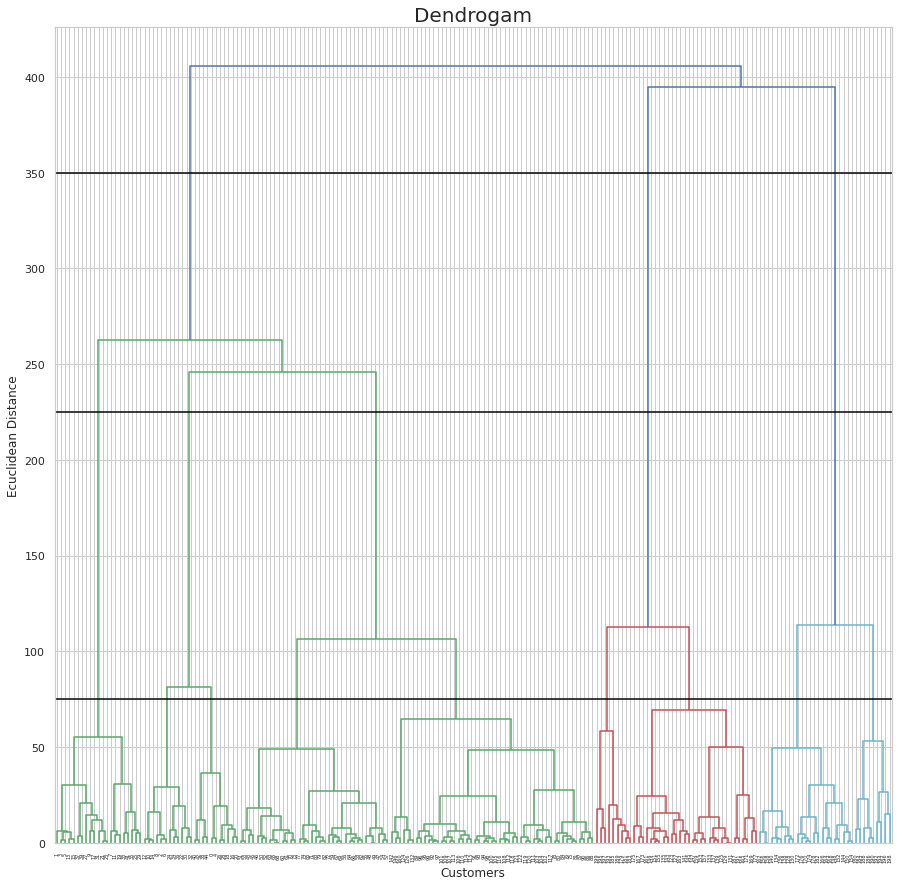

In [37]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize = (15,15))

distance_cuts = [75, 225, 350]

dendrogram = sch.dendrogram(sch.linkage(clustering_data_4, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')

for distance in distance_cuts:
  plt.axhline(y=distance, color='black', linestyle='-') 

plt.show()

Hemos decidido cortar el dataset en las siguientes distancias máximas:

* 75: Resultará en 9 clusters.
* 225: Resultará en 5 clusters.
* 350: Resultará en 3 clusters.

Vamos a visualizar los resultados de dichas distancias:

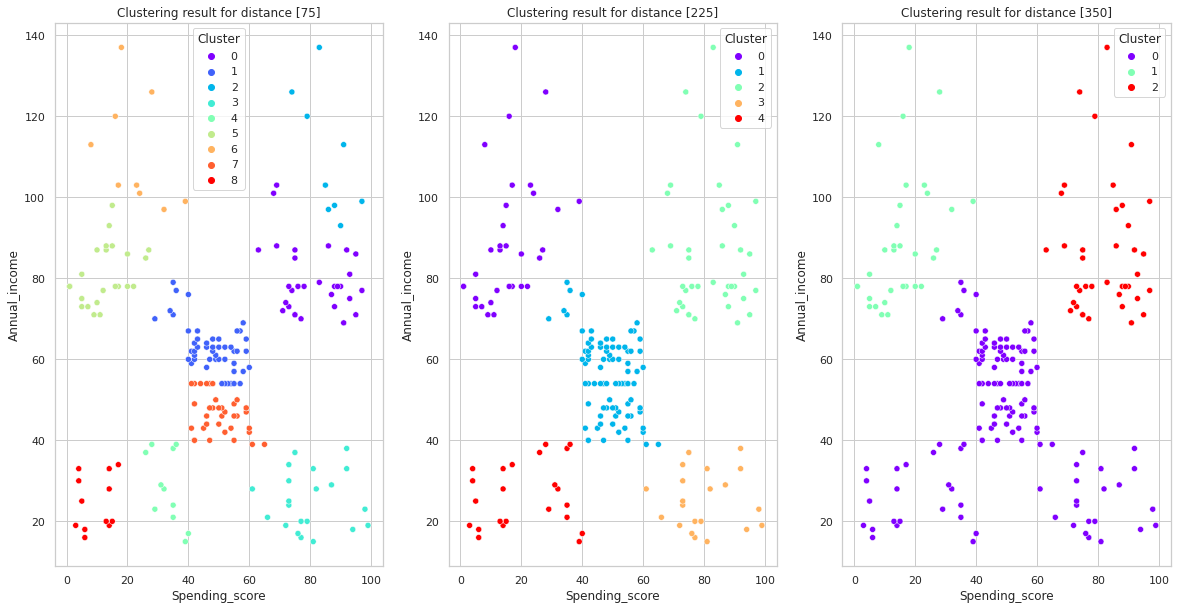

In [38]:
from sklearn.cluster import AgglomerativeClustering

fig, axs = plt.subplots(nrows=1, ncols=len(distance_cuts),figsize=(20,10))
var_x ='Spending_score'
var_y = 'Annual_income'

for distance_thresh, ax in zip(distance_cuts, axs.flatten()):
  clustering_agg_iter = clustering_data_4.copy()
  agg_clustering_iter = AgglomerativeClustering(distance_threshold = distance_thresh, n_clusters=None, affinity = 'euclidean', linkage = 'ward')
  clustering_agg_iter['Cluster'] = agg_clustering_iter.fit_predict(clustering_agg_iter)
  sns.scatterplot(data = clustering_agg_iter, x = var_x, y = var_y, hue='Cluster', ax=ax, palette = 'rainbow', legend='full')
  ax.set_title('Clustering result for distance [{0}]'.format(distance_thresh))